# Prediction of the number of brownlow votes a player will receive

In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats as stats
from sklearn import ensemble
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import time
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
# Methods
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_predict

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, average_precision_score, log_loss
import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## Exploratory Data Analysis

## Data Cleaning

In [2]:
data=pd.read_csv("RawData.csv")

In [3]:
data.head()

,Date,Name,Team,Season,Round,Home Team,Away Team,Home Score,Away Score,Margin,...,Frees For,Frees Against,Contested Pos,Uncontested Pos,Contested Marks,Marks Inside 50,One Percenters,Goal Assists,Brownlow Votes,TOG
0,2019-09-28 00:00:00,Zac Williams,Greater Western Sydney,2019.0,GF,Richmond,Greater Western Sydney,114,25,89,...,0.0,0.0,7.0,13.0,0.0,1.0,0.0,0.0,0.0,68
1,2019-09-28 00:00:00,Lachie Whitfield,Greater Western Sydney,2019.0,GF,Richmond,Greater Western Sydney,114,25,89,...,0.0,1.0,4.0,9.0,0.0,0.0,1.0,0.0,0.0,91
2,2019-09-28 00:00:00,Adam Tomlinson,Greater Western Sydney,2019.0,GF,Richmond,Greater Western Sydney,114,25,89,...,0.0,1.0,6.0,11.0,0.0,0.0,1.0,0.0,0.0,83
3,2019-09-28 00:00:00,Sam Taylor,Greater Western Sydney,2019.0,GF,Richmond,Greater Western Sydney,114,25,89,...,1.0,0.0,6.0,8.0,1.0,0.0,9.0,0.0,0.0,91
4,2019-09-28 00:00:00,Tim Taranto,Greater Western Sydney,2019.0,GF,Richmond,Greater Western Sydney,114,25,89,...,3.0,1.0,15.0,18.0,0.0,0.0,1.0,0.0,0.0,80


In [4]:
data.tail()

,Date,Name,Team,Season,Round,Home Team,Away Team,Home Score,Away Score,Margin,...,Frees For,Frees Against,Contested Pos,Uncontested Pos,Contested Marks,Marks Inside 50,One Percenters,Goal Assists,Brownlow Votes,TOG
146602,2003-03-30 00:00:00,Wayne Carey,Adelaide,2003.0,1,Adelaide,Fremantle,145,89,56,...,1.0,2.0,9.0,4.0,3.0,4.0,4.0,2.0,0.0,85
146603,2003-03-30 00:00:00,Brett Burton,Adelaide,2003.0,1,Adelaide,Fremantle,145,89,56,...,0.0,0.0,9.0,11.0,0.0,0.0,1.0,0.0,0.0,90
146604,2003-03-30 00:00:00,Matthew Bode,Adelaide,2003.0,1,Adelaide,Fremantle,145,89,56,...,1.0,2.0,9.0,12.0,0.0,0.0,1.0,0.0,0.0,96
146605,2003-03-30 00:00:00,Rhett Biglands,Adelaide,2003.0,1,Adelaide,Fremantle,145,89,56,...,1.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,47
146606,2003-03-30 00:00:00,Mark Bickley,Adelaide,2003.0,1,Adelaide,Fremantle,145,89,56,...,1.0,1.0,7.0,10.0,0.0,1.0,0.0,3.0,0.0,61


In [5]:
data.dtypes

Date                object
Name                object
Team                object
Season             float64
Round               object
Home Team           object
Away Team           object
Home Score           int64
Away Score           int64
Margin               int64
Disposals          float64
Kicks              float64
Marks              float64
Handballs          float64
Goals              float64
Behinds            float64
Hitouts            float64
Tackles            float64
Rebounds           float64
Inside 50s         float64
Clearances         float64
Clangers           float64
Frees For          float64
Frees Against      float64
Contested Pos      float64
Uncontested Pos    float64
Contested Marks    float64
Marks Inside 50    float64
One Percenters     float64
Goal Assists       float64
Brownlow Votes     float64
TOG                  int64
dtype: object

The dataset is large and sorted by date in a descending order. There are 32 variables and 146606 samples in total.

The goal of this report is to predict how many Brownlow votes individual awarded, it can be 0, 1, 2 or 3. There are total 4 categories in the classification problem.

In [6]:
data['Name'].value_counts()

Scott Thompson     535
Josh Kennedy       489
Nathan Brown       378
Shaun Burgoyne     359
Brendon Goddard    334
Gary Ablett        333
Luke Hodge         331
Jarrad McVeigh     325
Kade Simpson       325
Sam Mitchell       320
Name: Name, dtype: int64

There are too many levels in `Name` variable. Including `Name` in our predictor may cause overfitting problem. The `Name` is removed. 

In [7]:
data['Team'].value_counts()

Sydney                    9020
Geelong                   8976
Collingwood               8866
West Coast                8822
Hawthorn                  8800
Adelaide                  8667
Port Adelaide             8602
St Kilda                  8602
Western Bulldogs          8602
Fremantle                 8558
North Melbourne           8514
Richmond                  8470
Brisbane Lions            8470
Essendon                  8426
Melbourne                 8382
Carlton                   8360
Gold Coast                4356
Greater Western Sydney    4114
Name: Team, dtype: int64

There are a total number of `18` teams in the dataset. The `Team` is also a categorical variable.

In [8]:
data['Season'].value_counts()

2019.0    9108
2018.0    9108
2017.0    9108
2016.0    9108
2014.0    9108
2013.0    9108
2012.0    9108
2015.0    9064
2011.0    8624
2010.0    8184
2009.0    8140
2008.0    8140
2007.0    8140
2006.0    8140
2005.0    8140
2004.0    8140
2003.0    8139
Name: Season, dtype: int64

The `Season` variable indicates what year the competition was happened. This variable can help us partition the dataset more easily than `Date` variable.

In [9]:
data['Round'].value_counts()

22    6336
20    6336
3     6336
17    6336
21    6336
2     6336
18    6336
7     6336
1     6335
5     6292
19    6292
4     6292
16    6292
6     6292
8     6204
15    6204
10    6160
9     6160
14    5896
11    5808
12    5632
13    5412
23    3520
EF    1496
QF    1496
SF    1496
PF    1496
GF     792
24     352
Name: Round, dtype: int64

In [10]:
data['Home Team'].value_counts()

Geelong                   9108
Sydney                    9064
Hawthorn                  8932
Collingwood               8910
West Coast                8844
Port Adelaide             8668
Western Bulldogs          8580
Brisbane Lions            8580
Adelaide                  8579
St Kilda                  8558
Fremantle                 8492
Richmond                  8448
North Melbourne           8448
Melbourne                 8360
Carlton                   8316
Essendon                  8316
Gold Coast                4356
Greater Western Sydney    4048
Name: Home Team, dtype: int64

In [11]:
data['Away Team'].value_counts()

Sydney                    8976
Geelong                   8844
Collingwood               8822
West Coast                8800
Adelaide                  8756
Hawthorn                  8668
St Kilda                  8646
Western Bulldogs          8624
Fremantle                 8623
North Melbourne           8580
Port Adelaide             8536
Essendon                  8536
Richmond                  8492
Carlton                   8404
Melbourne                 8404
Brisbane Lions            8360
Gold Coast                4356
Greater Western Sydney    4180
Name: Away Team, dtype: int64

In [12]:
del data['Date']
del data['Name']

In [13]:
data['Round'].astype('category')

0         GF
1         GF
2         GF
3         GF
4         GF
          ..
146602     1
146603     1
146604     1
146605     1
146606     1
Name: Round, Length: 146607, dtype: category
Categories (29, object): ['1', '10', '11', '12', ..., 'GF', 'PF', 'QF', 'SF']

## Data exploration

In [14]:
data['Brownlow Votes'].value_counts()

0.0    137154
1.0      3151
3.0      3151
2.0      3151
Name: Brownlow Votes, dtype: int64

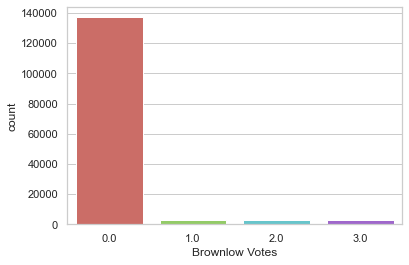

In [15]:
sns.countplot(x='Brownlow Votes',data=data,palette='hls')
plt.show()

In [16]:
count_zero = len(data[data['Brownlow Votes']==0.0])
count_one = len(data[data['Brownlow Votes']==1.0])
count_two = len(data[data['Brownlow Votes']==2.0])
count_three = len(data[data['Brownlow Votes']==3.0])
count_total=count_zero+count_one+count_two+count_three
pct_of_zero = count_zero/(count_total)
pct_of_one = count_one/(count_total)
pct_of_two = count_two/(count_total)
pct_of_three = count_three/(count_total)
print("percentage of zero is", pct_of_zero*100)
print("percentage of one is", pct_of_one*100)
print("percentage of two is", pct_of_two*100)
print("percentage of three is", pct_of_three*100)

percentage of zero is 93.55214962450633
percentage of one is 2.149283458497889
percentage of two is 2.149283458497889
percentage of three is 2.149283458497889


In [17]:
data.groupby('Brownlow Votes').mean()

,Season,Home Score,Away Score,Margin,Disposals,Kicks,Marks,Handballs,Goals,Behinds,...,Clangers,Frees For,Frees Against,Contested Pos,Uncontested Pos,Contested Marks,Marks Inside 50,One Percenters,Goal Assists,TOG
Brownlow Votes,,,,,,,,,,,,,,,,,,,,,
0.0,2011.240022,94.605407,86.126354,8.479053,15.355979,8.813757,4.053990,6.542223,0.525460,0.400185,...,2.075295,0.792620,0.819298,5.704697,9.564154,0.468860,0.510856,2.155548,0.362636,81.437093
1.0,2011.181530,94.384957,87.103459,7.281498,24.225008,14.270073,5.944462,9.954935,1.420184,0.732149,...,2.639480,1.256744,0.901619,9.420501,14.663916,0.814345,1.175500,1.901936,0.673754,87.078388
2.0,2011.181530,94.384957,87.103459,7.281498,25.643288,15.016503,6.125992,10.626785,1.598540,0.733418,...,2.642018,1.343383,0.901301,10.157093,15.328785,0.853697,1.243732,1.792447,0.715646,87.382101
3.0,2011.181530,94.384957,87.103459,7.281498,27.785782,16.208823,6.354173,11.576960,1.880673,0.814662,...,2.837195,1.428753,0.945414,11.298953,16.304665,0.946366,1.435735,1.756585,0.804189,87.366550


In [18]:
stats.f_oneway(data['Home Score'][data['Brownlow Votes']==0],
              data['Home Score'][data['Brownlow Votes']==1],
              data['Home Score'][data['Brownlow Votes']==2],
              data['Home Score'][data['Brownlow Votes']==3])

F_onewayResult(statistic=0.18832306508855398, pvalue=0.9044027212072443)

In [19]:
stats.f_oneway(data['Away Score'][data['Brownlow Votes']==0],
              data['Away Score'][data['Brownlow Votes']==1],
              data['Away Score'][data['Brownlow Votes']==2],
              data['Away Score'][data['Brownlow Votes']==3])

F_onewayResult(statistic=3.775842079182312, pvalue=0.010082319168831006)

In [20]:
stats.f_oneway(data['Margin'][data['Brownlow Votes']==0],
              data['Margin'][data['Brownlow Votes']==1],
              data['Margin'][data['Brownlow Votes']==2],
              data['Margin'][data['Brownlow Votes']==3])

F_onewayResult(statistic=2.2041831381143275, pvalue=0.08533271951477331)

In [21]:
stats.f_oneway(data['Disposals'][data['Brownlow Votes']==0],
              data['Disposals'][data['Brownlow Votes']==1],
              data['Disposals'][data['Brownlow Votes']==2],
              data['Disposals'][data['Brownlow Votes']==3])

F_onewayResult(statistic=7579.49772255486, pvalue=0.0)

In [22]:
stats.f_oneway(data['Kicks'][data['Brownlow Votes']==0],
              data['Kicks'][data['Brownlow Votes']==1],
              data['Kicks'][data['Brownlow Votes']==2],
              data['Kicks'][data['Brownlow Votes']==3])

F_onewayResult(statistic=6432.167547137027, pvalue=0.0)

In [23]:
stats.f_oneway(data['Marks'][data['Brownlow Votes']==0],
              data['Marks'][data['Brownlow Votes']==1],
              data['Marks'][data['Brownlow Votes']==2],
              data['Marks'][data['Brownlow Votes']==3])

F_onewayResult(statistic=1945.3853297668968, pvalue=0.0)

In [24]:
stats.f_oneway(data['Handballs'][data['Brownlow Votes']==0],
              data['Handballs'][data['Brownlow Votes']==1],
              data['Handballs'][data['Brownlow Votes']==2],
              data['Handballs'][data['Brownlow Votes']==3])

F_onewayResult(statistic=3130.4081047823074, pvalue=0.0)

In [25]:
stats.f_oneway(data['Goals'][data['Brownlow Votes']==0],
              data['Goals'][data['Brownlow Votes']==1],
              data['Goals'][data['Brownlow Votes']==2],
              data['Goals'][data['Brownlow Votes']==3])

F_onewayResult(statistic=3860.1036589971036, pvalue=0.0)

In [26]:
stats.f_oneway(data['Behinds'][data['Brownlow Votes']==0],
              data['Behinds'][data['Brownlow Votes']==1],
              data['Behinds'][data['Brownlow Votes']==2],
              data['Behinds'][data['Brownlow Votes']==3])

F_onewayResult(statistic=684.512149390364, pvalue=0.0)

In [27]:
stats.f_oneway(data['Hitouts'][data['Brownlow Votes']==0],
              data['Hitouts'][data['Brownlow Votes']==1],
              data['Hitouts'][data['Brownlow Votes']==2],
              data['Hitouts'][data['Brownlow Votes']==3])

F_onewayResult(statistic=4.020065804955115, pvalue=0.007181284816947963)

In [28]:
stats.f_oneway(data['Tackles'][data['Brownlow Votes']==0],
              data['Tackles'][data['Brownlow Votes']==1],
              data['Tackles'][data['Brownlow Votes']==2],
              data['Tackles'][data['Brownlow Votes']==3])

F_onewayResult(statistic=644.8570804780853, pvalue=0.0)

In [29]:
stats.f_oneway(data['Rebounds'][data['Brownlow Votes']==0],
              data['Rebounds'][data['Brownlow Votes']==1],
              data['Rebounds'][data['Brownlow Votes']==2],
              data['Rebounds'][data['Brownlow Votes']==3])

F_onewayResult(statistic=122.98804371763383, pvalue=1.4695000892275644e-79)

In [30]:
stats.f_oneway(data['Inside 50s'][data['Brownlow Votes']==0],
              data['Inside 50s'][data['Brownlow Votes']==1],
              data['Inside 50s'][data['Brownlow Votes']==2],
              data['Inside 50s'][data['Brownlow Votes']==3])

F_onewayResult(statistic=3355.7168120401693, pvalue=0.0)

In [31]:
stats.f_oneway(data['Clearances'][data['Brownlow Votes']==0],
              data['Clearances'][data['Brownlow Votes']==1],
              data['Clearances'][data['Brownlow Votes']==2],
              data['Clearances'][data['Brownlow Votes']==3])

F_onewayResult(statistic=3932.6000276095415, pvalue=0.0)

In [32]:
stats.f_oneway(data['Clangers'][data['Brownlow Votes']==0],
              data['Clangers'][data['Brownlow Votes']==1],
              data['Clangers'][data['Brownlow Votes']==2],
              data['Clangers'][data['Brownlow Votes']==3])

F_onewayResult(statistic=460.76058164473415, pvalue=5.224879203820748e-298)

In [33]:
stats.f_oneway(data['Frees For'][data['Brownlow Votes']==0],
              data['Frees For'][data['Brownlow Votes']==1],
              data['Frees For'][data['Brownlow Votes']==2],
              data['Frees For'][data['Brownlow Votes']==3])

F_onewayResult(statistic=959.6737317785103, pvalue=0.0)

In [34]:
stats.f_oneway(data['Frees Against'][data['Brownlow Votes']==0],
              data['Frees Against'][data['Brownlow Votes']==1],
              data['Frees Against'][data['Brownlow Votes']==2],
              data['Frees Against'][data['Brownlow Votes']==3])

F_onewayResult(statistic=31.064173055854127, pvalue=4.581555755532716e-20)

In [35]:
stats.f_oneway(data['Contested Pos'][data['Brownlow Votes']==0],
              data['Contested Pos'][data['Brownlow Votes']==1],
              data['Contested Pos'][data['Brownlow Votes']==2],
              data['Contested Pos'][data['Brownlow Votes']==3])

F_onewayResult(statistic=5733.372626614072, pvalue=0.0)

In [36]:
stats.f_oneway(data['Uncontested Pos'][data['Brownlow Votes']==0],
              data['Uncontested Pos'][data['Brownlow Votes']==1],
              data['Uncontested Pos'][data['Brownlow Votes']==2],
              data['Uncontested Pos'][data['Brownlow Votes']==3])

F_onewayResult(statistic=3940.0026895884284, pvalue=0.0)

In [37]:
stats.f_oneway(data['Contested Marks'][data['Brownlow Votes']==0],
              data['Contested Marks'][data['Brownlow Votes']==1],
              data['Contested Marks'][data['Brownlow Votes']==2],
              data['Contested Marks'][data['Brownlow Votes']==3])

F_onewayResult(statistic=675.9303279462322, pvalue=0.0)

In [38]:
stats.f_oneway(data['Marks Inside 50'][data['Brownlow Votes']==0],
              data['Marks Inside 50'][data['Brownlow Votes']==1],
              data['Marks Inside 50'][data['Brownlow Votes']==2],
              data['Marks Inside 50'][data['Brownlow Votes']==3])

F_onewayResult(statistic=1629.347575633328, pvalue=0.0)

In [39]:
stats.f_oneway(data['One Percenters'][data['Brownlow Votes']==0],
              data['One Percenters'][data['Brownlow Votes']==1],
              data['One Percenters'][data['Brownlow Votes']==2],
              data['One Percenters'][data['Brownlow Votes']==3])

F_onewayResult(statistic=71.8965942430264, pvalue=1.8557377109523284e-46)

In [40]:
stats.f_oneway(data['Goal Assists'][data['Brownlow Votes']==0],
              data['Goal Assists'][data['Brownlow Votes']==1],
              data['Goal Assists'][data['Brownlow Votes']==2],
              data['Goal Assists'][data['Brownlow Votes']==3])

F_onewayResult(statistic=914.4226889653761, pvalue=0.0)

In [41]:
stats.f_oneway(data['TOG'][data['Brownlow Votes']==0],
              data['TOG'][data['Brownlow Votes']==1],
              data['TOG'][data['Brownlow Votes']==2],
              data['TOG'][data['Brownlow Votes']==3])

F_onewayResult(statistic=453.65069909804026, pvalue=2.0113029893374652e-293)

**Conclusion**:
- `Away Score`,`Home Score` and `Margin` is not significant at 1%, therefore, we drop these variables

#### Observations: 

 - The average of `Margin`, `Disposal`,`Kicks`,`Marks`,`Handballs`,`Goals`,`Behinds`,`Clangers`,`Frees For`, `Frees Against`, `Contested Pos`,`Uncontested Marks`,`Contested Marks`,`Marks Inside 50`,`Goal Assists` is higher when the `Brownlow Votes` is higher
 - However, `Home Score`, `Away Score` is not that different across the different votes

## Benchmark Model - logistic regression

### One hot encoding

In [42]:
cate_list=['Team','Round','Home Team', 'Away Team']
cate_data=data[cate_list]
cate_data=pd.get_dummies(cate_data)
non_cate_data=data.drop(cate_list,axis=1)

In [43]:
data = pd.concat([cate_data,non_cate_data],axis=1)

In [44]:
data

,Team_Adelaide,Team_Brisbane Lions,Team_Carlton,Team_Collingwood,Team_Essendon,Team_Fremantle,Team_Geelong,Team_Gold Coast,Team_Greater Western Sydney,Team_Hawthorn,...,Frees For,Frees Against,Contested Pos,Uncontested Pos,Contested Marks,Marks Inside 50,One Percenters,Goal Assists,Brownlow Votes,TOG
0,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,7.0,13.0,0.0,1.0,0.0,0.0,0.0,68
1,0,0,0,0,0,0,0,0,1,0,...,0.0,1.0,4.0,9.0,0.0,0.0,1.0,0.0,0.0,91
2,0,0,0,0,0,0,0,0,1,0,...,0.0,1.0,6.0,11.0,0.0,0.0,1.0,0.0,0.0,83
3,0,0,0,0,0,0,0,0,1,0,...,1.0,0.0,6.0,8.0,1.0,0.0,9.0,0.0,0.0,91
4,0,0,0,0,0,0,0,0,1,0,...,3.0,1.0,15.0,18.0,0.0,0.0,1.0,0.0,0.0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146602,1,0,0,0,0,0,0,0,0,0,...,1.0,2.0,9.0,4.0,3.0,4.0,4.0,2.0,0.0,85
146603,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,9.0,11.0,0.0,0.0,1.0,0.0,0.0,90
146604,1,0,0,0,0,0,0,0,0,0,...,1.0,2.0,9.0,12.0,0.0,0.0,1.0,0.0,0.0,96
146605,1,0,0,0,0,0,0,0,0,0,...,1.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,47


### Split Training set and Test set

In [45]:
training_sample_size=8139+6*8140+8184+8624+3*9108+9064+22
test_sample_size=9108*4-22
training_sample_size+test_sample_size

146607

In [46]:
test_sample=data.head(test_sample_size)
training_sample=data.tail(training_sample_size)

### Model

In [47]:
features=data.columns.tolist()
del features[-2]
features.remove('Season')
features.remove('Away Score')
features.remove('Home Score')
features.remove('Margin')

In [ ]:
target='Brownlow Votes'

In [50]:
X_train=training_sample[features]
y_train=training_sample[target]
X_test=test_sample[features]
y_test=test_sample[target]

In [51]:
logreg=LogisticRegression(multi_class="multinomial",max_iter=1e100)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1e+100, multi_class='multinomial')

In [52]:
predictions=logreg.predict(X_test)

In [53]:
(predictions==y_test).sum()/36409

0.9416353099508363

In [54]:
(y_test==0).sum()/36409

0.9372407921118405

# Conclusion from Logistic Regression
- The model is better than purely guessing zero (according to the higher probability) 
- The accuracy is 94.1%, the baseline is actually 93.7%
- Maybe name can be a factor that determines the probability of getting brownlow votes, if some people attend the competition regurlarly, they might be skillful and have higher probability of wining the game

# Further Exploration: Classification Tree and Random forests
- I actually tried this method but waiting for 2 hours long, the code is still running
- It might be better than logistic regression, however, the accuracy of logistic regression model is actually high and using Random forests and Decision Tree might be inefficient (take time into consideration)

In [55]:
Classification_tree_ab = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = 5)
path_ab = Classification_tree_ab.cost_complexity_pruning_path(X_train, y_train)
alphas_ab = path_ab.ccp_alphas

In [ ]:
%%time


tic = time.time()
tuning_parameters = {
    'ccp_alpha': alphas_ab,
}

pruned_tree_ab = GridSearchCV(Classification_tree_ab, tuning_parameters, cv = 5 , scoring='neg_log_loss')
pruned_tree_ab.fit(X_train, y_train)
#tree = tree_search.best_estimator_

toc = time.time()
print("Training time: {0:.4f}s".format(toc - tic))

In [ ]:
# importance
plot_feature_importance(pruned_tree_ab.best_estimator_, predictors)
plt.show()

In [ ]:
# Setting the random forest model and setting grid search
rf = ensemble.RandomForestClassifier(class_weight = 'balanced',
                                      random_state=1) # considering imbalanced dataset

param_grid_rf = {'n_estimators': np.arange(100,650,200),
                 'min_samples_leaf':[2]}

rf_cv = GridSearchCV(rf, param_grid_rf,n_jobs = -1, cv = 5)

In [ ]:
# Random Forest on dataset 2 (advanced bookings)
tic = time.time()
rf_cv.fit(X_train, y_train)
toc = time.time()
print("Training time: {0:.4f}s".format(toc - tic))

y_pred_rf_cv2 = rf_cv.predict(X_test)

print(classification_report(y_test, y_pred_rf_cv2))
print(confusion_matrix(y_test, y_pred_rf_cv2))
print('Best parameters found by Gridsearch:', rf_cv.best_params_, '\n')

In [ ]:
plot_feature_importance(rf_cv.best_estimator_, predictors)
plt.show()